# FINAL PROJECT 4: CLUSTERING
Project ini untuk memenuhi tugas dari Course Introduction To Python For Data Science
## Member Kelompok: 
- Yusraini Nurul Asra
- Arya Rahman

## A. Introduction
### Abstract
<p style='text-align: justify;'>
    Sebuah kartu kredit memungkinkan pengguna untuk meminjam uang dari penerbitnya untuk pembelian atau penarikan uang tunai, yang harus dikembalikan dengan bunga. Segmentasi pelanggan melalui pengelompokan kartu kredit dapat membantu dalam pemasaran yang lebih tepat sasaran dengan membagi pelanggan berdasarkan pola pengeluaran. Dataset ini merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir dan terdapat 18 atribut dalam dataset. Dari data tersebut akan dilakukan pengelompokkan untuk mengetahui segmentasi pelanggan.</p>

### Data
<p style='text-align: justify;'>
Berikut adalah atribut yang terdapat dalam dataset:</p>

* CUST_ID: Identifikasi pemegang kartu kredit (Kategorikal)
* BALANCE: Jumlah saldo yang tersisa dalam akun untuk melakukan pembelian
* BALANCE_FREQUENCY: Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
* PURCHASES: Jumlah pembelian yang dilakukan dari akun
* ONEOFF_PURCHASES: Jumlah pembelian maksimum yang dilakukan sekaligus
* INSTALLMENTS_PURCHASES: Jumlah pembelian yang dilakukan dengan pembayaran cicilan
* CASH_ADVANCE: Uang tunai yang diberikan oleh pengguna
* PURCHASES_FREQUENCY: Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
* ONEOFF_PURCHASES_FREQUENCY: Seberapa sering Pembelian dilakukan sekaligus (1 = sering dibeli, 0 = tidak sering dibeli)
* PURCHASES_INSTALLMENTS_FREQUENCY: Seberapa sering pembelian dengan pembayaran cicilan dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
* CASH_ADVANCE_FREQUENCY: Seberapa sering uang tunai diambil
* CASH_ADVANCE_TRX: Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
* PURCHASES_TRX: Jumlah transaksi pembelian yang dilakukan
* CREDIT_LIMIT: Batas Kartu Kredit untuk pengguna
* PAYMENTS: Jumlah Pembayaran yang dilakukan oleh pengguna
* MINIMUM_PAYMENTS: Jumlah pembayaran minimum yang dilakukan oleh pengguna
* PRC_FULL_PAYMENT: Persentase pembayaran penuh yang dilakukan oleh pengguna
* TENURE: Jangka waktu layanan kartu kredit bagi pengguna

### Objective
Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

## B. Import Libraries

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling
import numpy as np
import pandas as pd
from numpy.random import uniform
import random
from random import sample
from math import isnan
from scipy.stats import gaussian_kde
from scipy.integrate import simps

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

# Model and Performance
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import os
import yellowbrick
from joblib import dump
from flask import Flask, jsonify, request
from joblib import load
from gevent.pywsgi import WSGIServer

# Settings
pd.set_option("display.max.columns",None)
%matplotlib inline
mpl.style.use(["seaborn"])

## C. Data Loading

### Import Dataset

In [2]:
# Membuka File dataset CC GENERAL.csv dengan Pandas
df = pd.read_csv('CC GENERAL.csv')
pd.set_option('display.max_columns', None)
df.reset_index(drop=True)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
# Melihat jumlah baris dan jumlah kolom pada data
print("Data tersebut memiliki jumlah baris",len(df), "dan kolom berjumlah",len(df.columns))

Data tersebut memiliki jumlah baris 8950 dan kolom berjumlah 18


## D. Data Cleaning

In [4]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Melihat Informasi lebih detail mengenai statistik DataFrame dapat dilihat menggunakan fungsi describe()
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Drop Unnecessary Column

In [6]:
# Drop attribute yang tidak diperlukan yakni CUST_ID
df = df.drop('CUST_ID', axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Check Duplicated Data

In [7]:
# Mengecek data duplikat
df.duplicated().sum()

0

### Check Missing Values

In [8]:
pd.DataFrame({
    "type":df.dtypes.values,
    "null":df.isnull().sum().values,
    "null_percentage":df.isnull().sum().values / len(df) * 100,
    "unique":[df[i].nunique() for i in df.columns],
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,type,null,null_percentage,unique,sample
MINIMUM_PAYMENTS,float64,313,3.497207,8636,99.150338
CREDIT_LIMIT,float64,1,0.011173,205,7100.000000
BALANCE,float64,0,0.000000,8871,1084.218952
CASH_ADVANCE_FREQUENCY,float64,0,0.000000,54,0.666667
PRC_FULL_PAYMENT,float64,0,0.000000,47,0.333333
PAYMENTS,float64,0,0.000000,8711,212.326548
PURCHASES_TRX,int64,0,0.000000,173,11.000000
CASH_ADVANCE_TRX,int64,0,0.000000,65,49.000000
PURCHASES_INSTALLMENTS_FREQUENCY,float64,0,0.000000,47,0.416667
BALANCE_FREQUENCY,float64,0,0.000000,43,0.625000


Pada kolom CREDIT_LIMIT terdapat 1 missing value dan pada MINIMUM_PAYMENTS terdapat 313 missing value, dimana nantinya akan diimpute dengan KNNIMPUTER di data preprocessing.

## E. Exploration Data Analysis

### Measure Central of Tendency

In [9]:
# Measure Central of Tendency : Mean, Median, Modus
MCT = df.describe().T
MCT.reset_index().rename(
    columns={'index': 'Attribute'})

,Attribute,count,mean,std,min,25%,50%,75%,max
0,BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
1,BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
2,PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
3,ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
4,INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
5,CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
6,PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
7,ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
8,PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
9,CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


### Measure of Spread/Dispersion dan Shape

In [10]:
# Measure of Spread/Dispersion : Variance, Range, Interquartile Range
# Measure of Shape : Skewness, Kurtosis

# Variance
variance_df = df.select_dtypes(
    include=[np.number]).var(ddof=1).to_frame()
variance_df.rename(columns={0: 'Variance'}, inplace=True)

# Skewness
skewness_df = df.select_dtypes(include=[np.number]).skew().to_frame()
skewness_df.rename(columns={0: 'Skewness'}, inplace=True)
skewness_df['Skewness Description'] = skewness_df['Skewness'].apply(
    lambda x: 'Distribusi Positif' if x > 0 else ('Distribusi Negatif' if x < 0 else 'Distribusi Simetrik'))

# Kurtosis
kurtosis_df = df.select_dtypes(include=[np.number]).kurtosis().to_frame()
kurtosis_df.rename(columns={0: 'Kurtosis'}, inplace=True)
kurtosis_df['Kurtosis Description'] = kurtosis_df['Kurtosis'].apply(
    lambda x: 'Leptokurtik' if x > 0 else ('Platykurtik' if x < 0 else 'Mesokurtik'))

# IQR
percentile_values = df.select_dtypes(
    include=[np.number]).quantile([0.25, 0.50, 0.75])
percentile_values.index = ['25%', '50%', '75%']
percentile_values = percentile_values.T
percentile_values['IQR'] = percentile_values['75%'] - percentile_values['25%']

# Menggabungkan semua hasil
Measure_of_Spread = pd.concat([variance_df, skewness_df, kurtosis_df, percentile_values['IQR']], axis=1)

# Tampilkan hasilnya
Measure_of_Spread.reset_index().rename(columns={'index': 'Attribute'})

,Attribute,Variance,Skewness,Skewness Description,Kurtosis,Kurtosis Description,IQR
0,BALANCE,4.332775e+06,2.393386,Distribusi Positif,7.674751,Leptokurtik,1925.858120
1,BALANCE_FREQUENCY,5.612351e-02,-2.023266,Distribusi Negatif,3.092370,Leptokurtik,0.111111
2,PURCHASES,4.565208e+06,8.144269,Distribusi Positif,111.388771,Leptokurtik,1070.495000
3,ONEOFF_PURCHASES,2.755228e+06,10.045083,Distribusi Positif,164.187572,Leptokurtik,577.405000
4,INSTALLMENTS_PURCHASES,8.178274e+05,7.299120,Distribusi Positif,96.575178,Leptokurtik,468.637500
5,CASH_ADVANCE,4.398096e+06,5.166609,Distribusi Positif,52.899434,Leptokurtik,1113.821139
6,PURCHASES_FREQUENCY,1.610985e-01,0.060164,Distribusi Positif,-1.638631,Platykurtik,0.833334
7,ONEOFF_PURCHASES_FREQUENCY,8.900441e-02,1.535613,Distribusi Positif,1.161846,Leptokurtik,0.300000
8,PURCHASES_INSTALLMENTS_FREQUENCY,1.579647e-01,0.509201,Distribusi Positif,-1.398632,Platykurtik,0.750000
9,CASH_ADVANCE_FREQUENCY,4.004857e-02,1.828686,Distribusi Positif,3.334734,Leptokurtik,0.222222


### Visualisasi Data

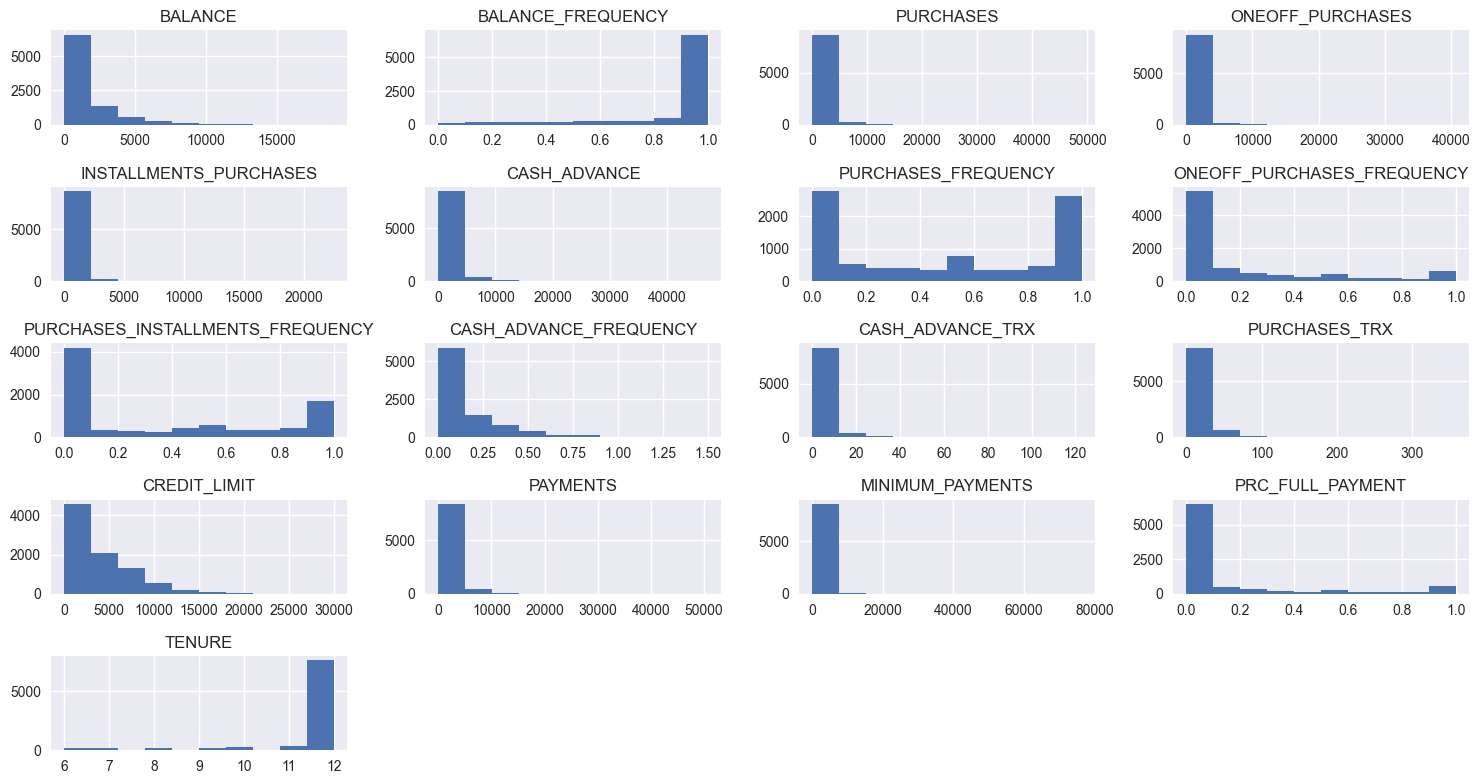

In [11]:
# Histogram
df.hist(figsize=(15, 8))
plt.title('Pesebaran Data')
plt.tight_layout()
plt.show()

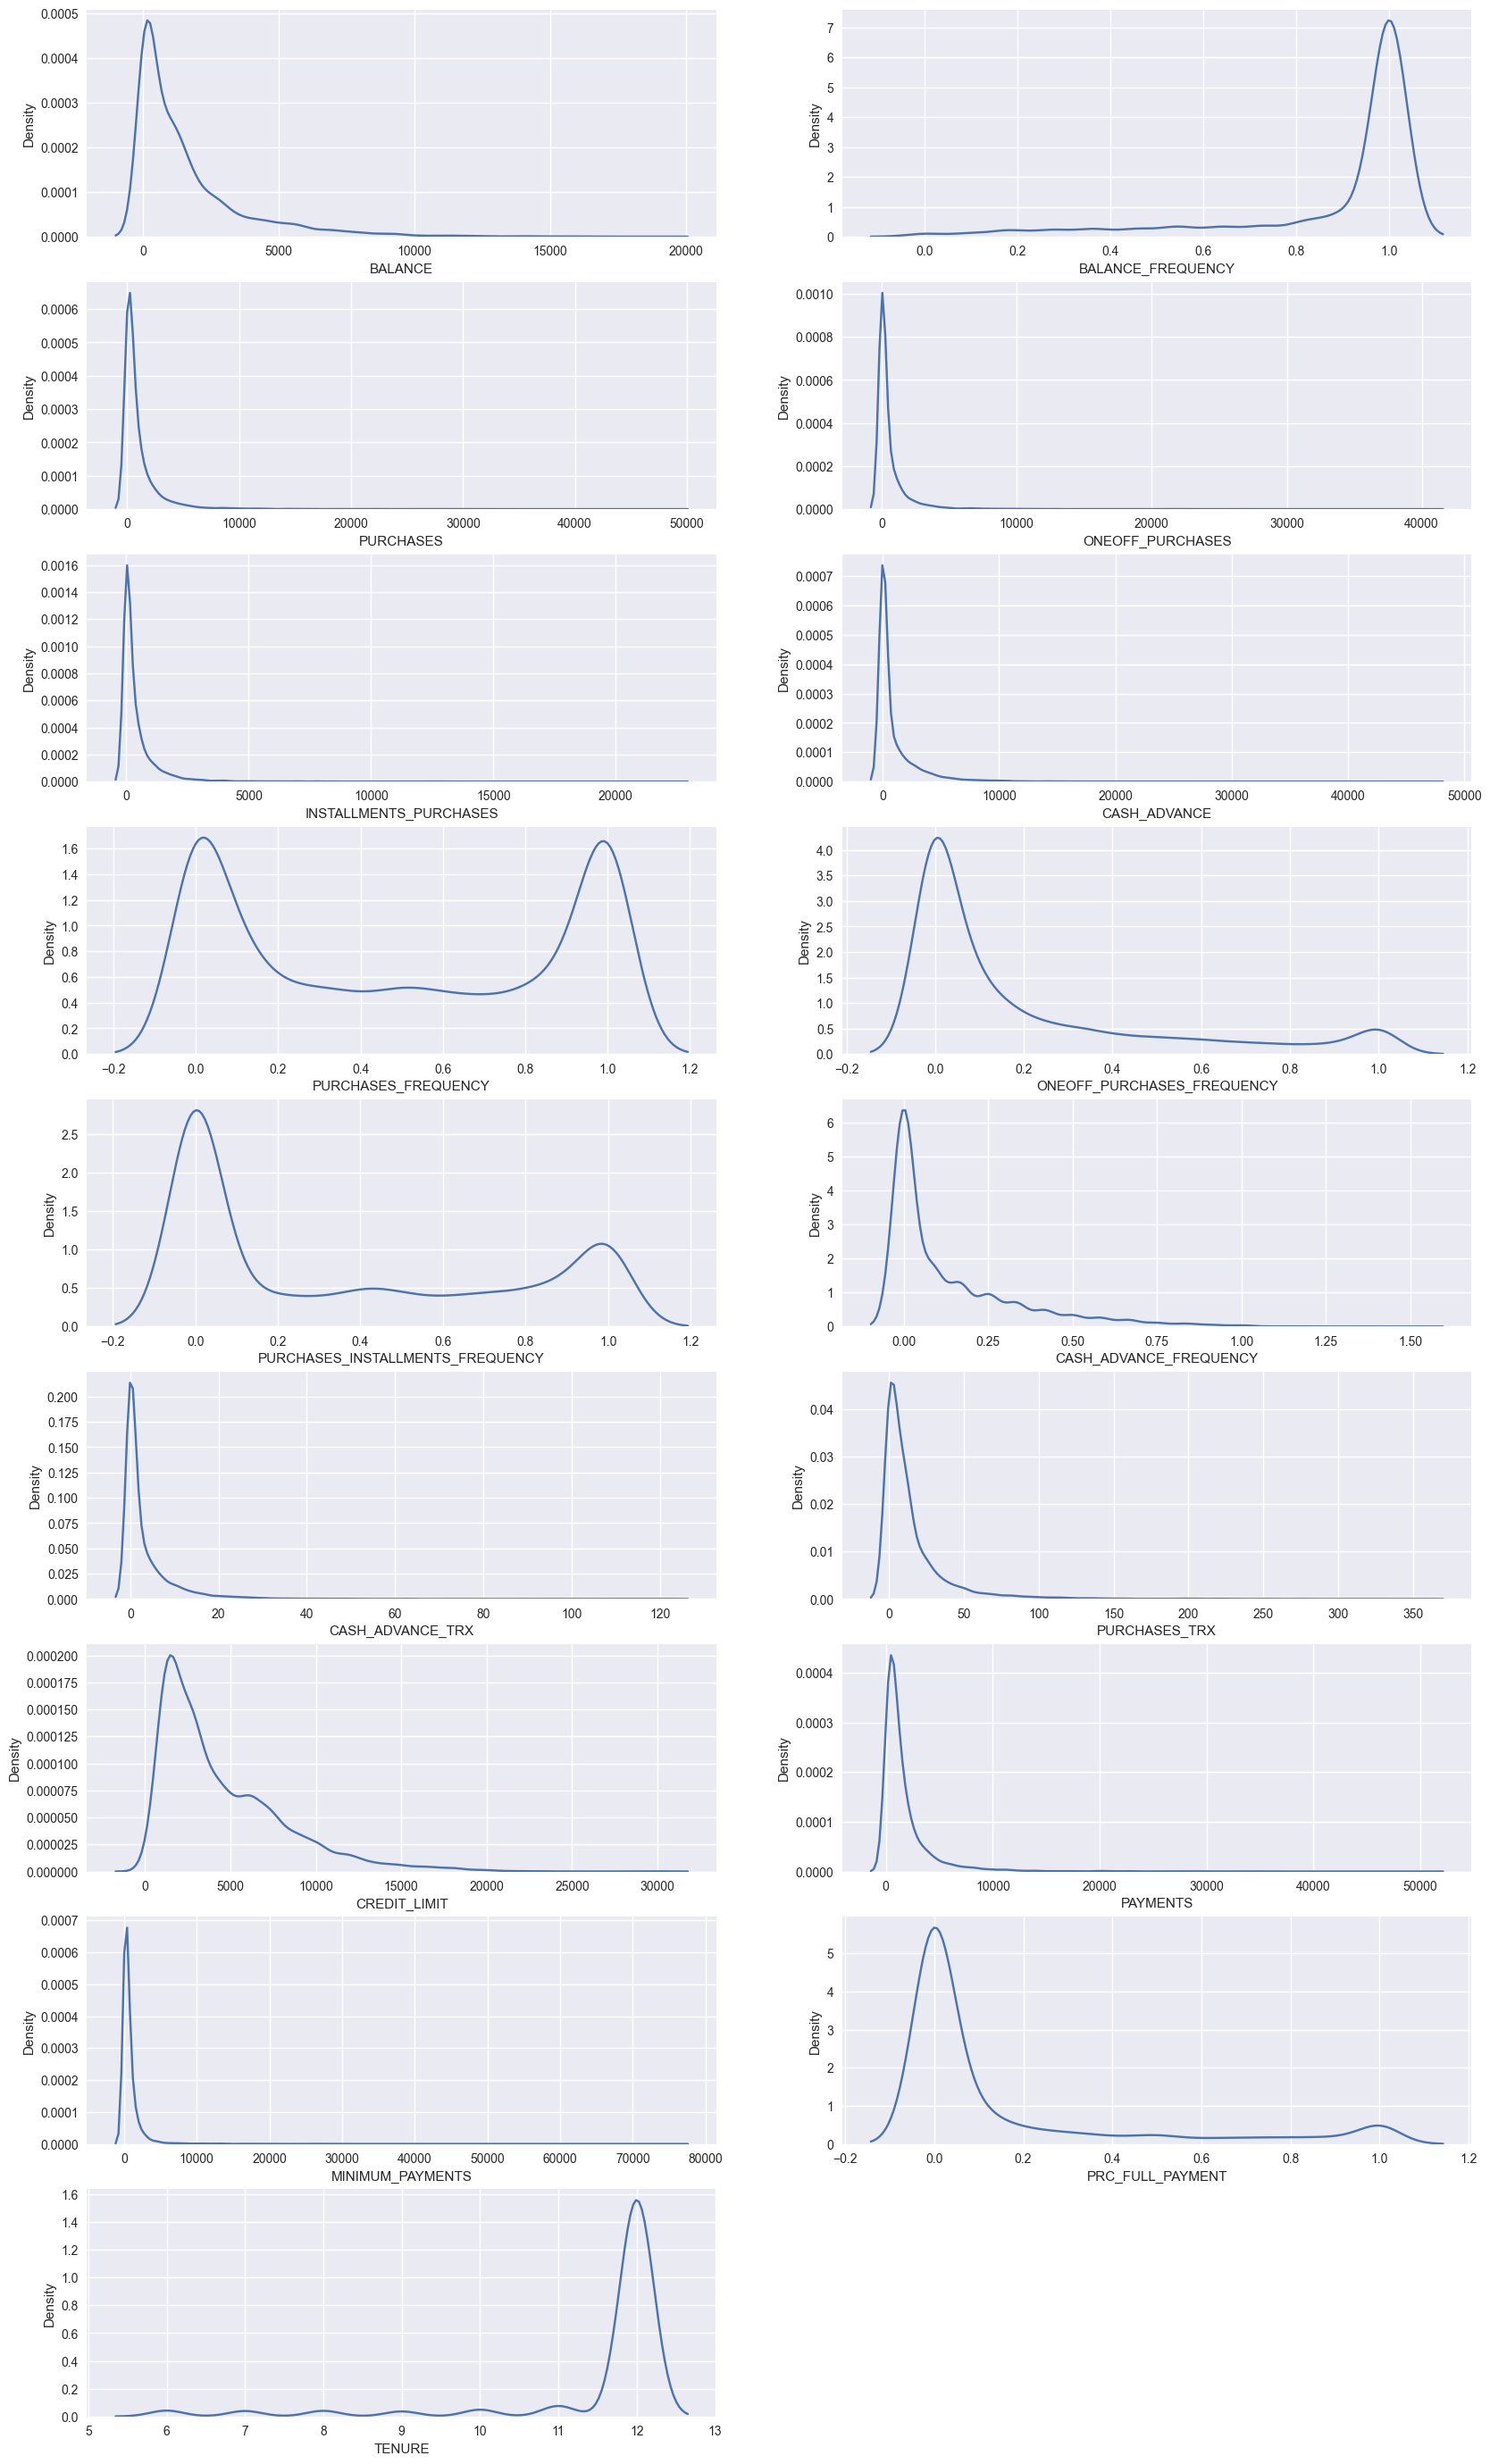

In [12]:
# KDE Plot
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Dari Histogram dan KDE Plot di atas dapat dilihat bahwa banyak kolom memiliki jumlah nilai 0 yang besar. Selain itu, sebagian besar kolom memiliki data terdistribusi condong ke kanan (positive skewed), seperti yang terlihat dari histogram dan perbandingan nilai rata-rata dan median (nilai rata-rata lebih besar daripada nilai median).

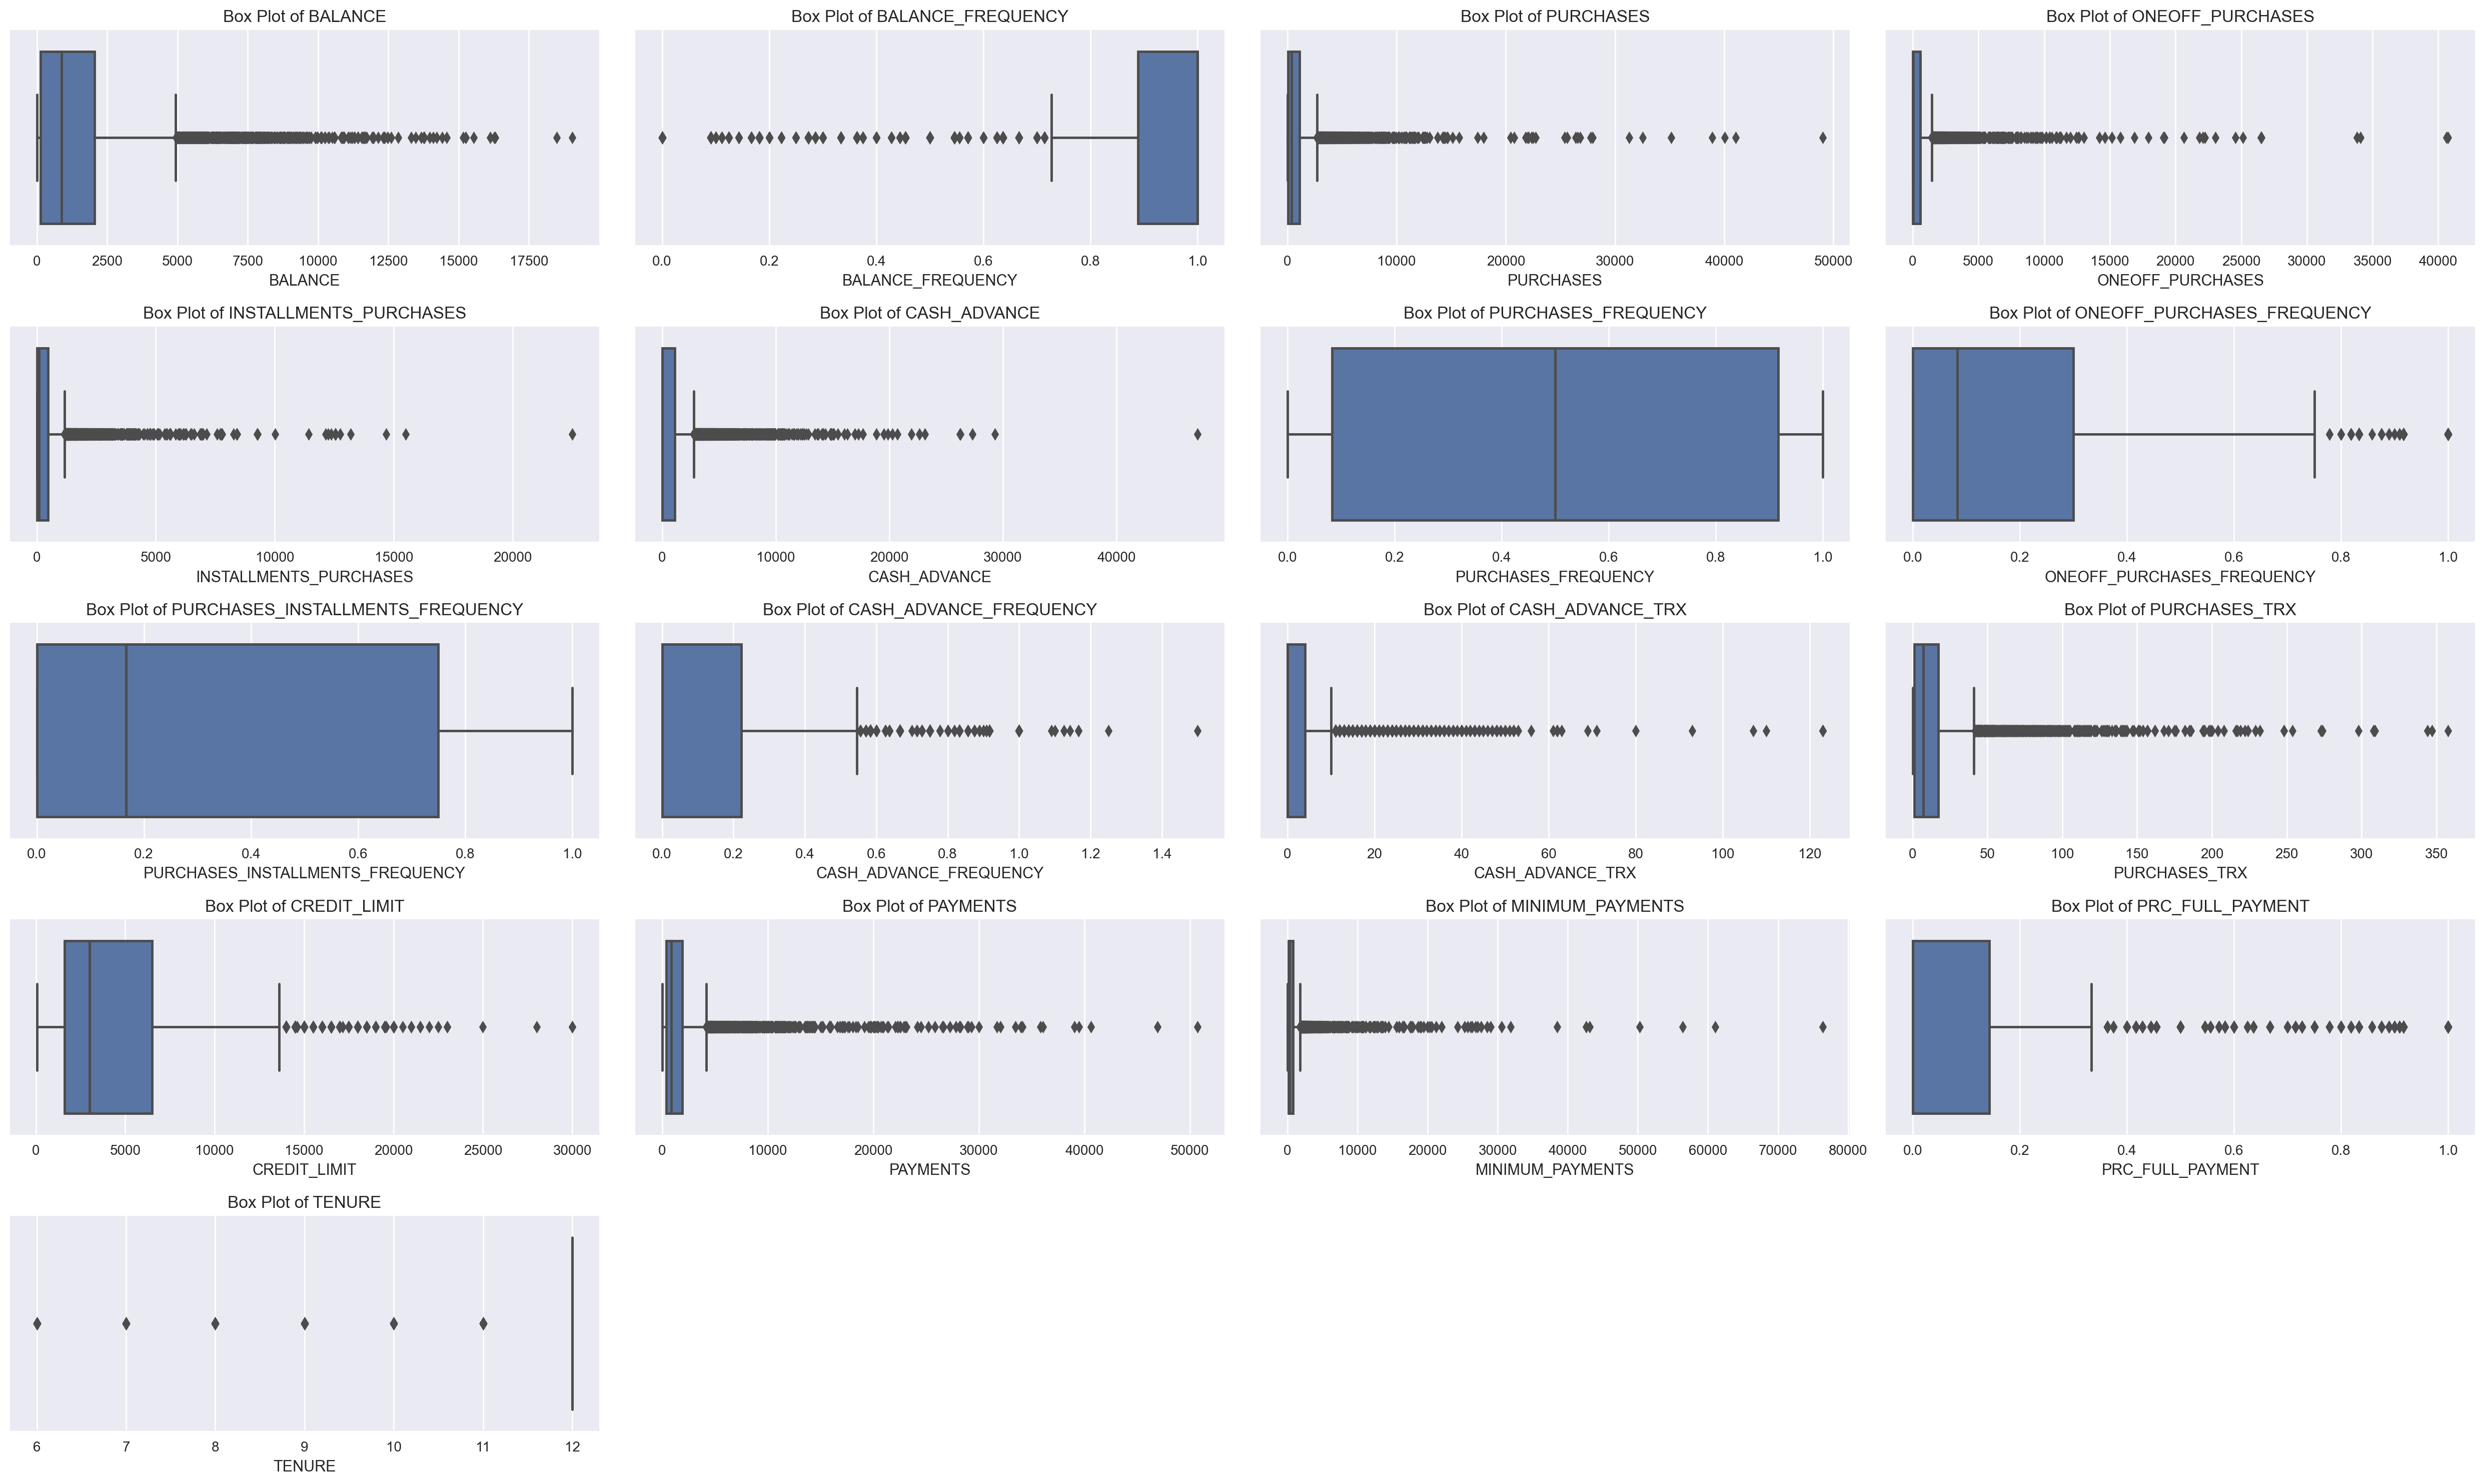

In [13]:
# Fungsi untuk Visualisasi Boxplot
def create_boxplot(nrows,ncols,data,x_axis):

    fig,ax = plt.subplots(nrows,ncols,figsize=(25,15),dpi=200)

    n = 0
    for nrow in range(nrows):
        for ncol in range(ncols):
            sns.boxplot(data=data,x=x_axis[n],ax=ax[nrow,ncol])
            ax[nrow,ncol].set_title(f"Box Plot of {x_axis[n]}")
            n += 1
            if n == len(x_axis):
                break

    for ax in ax.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

# Memvisualisasikan Boxplot
create_boxplot(5,4,df,df.columns)

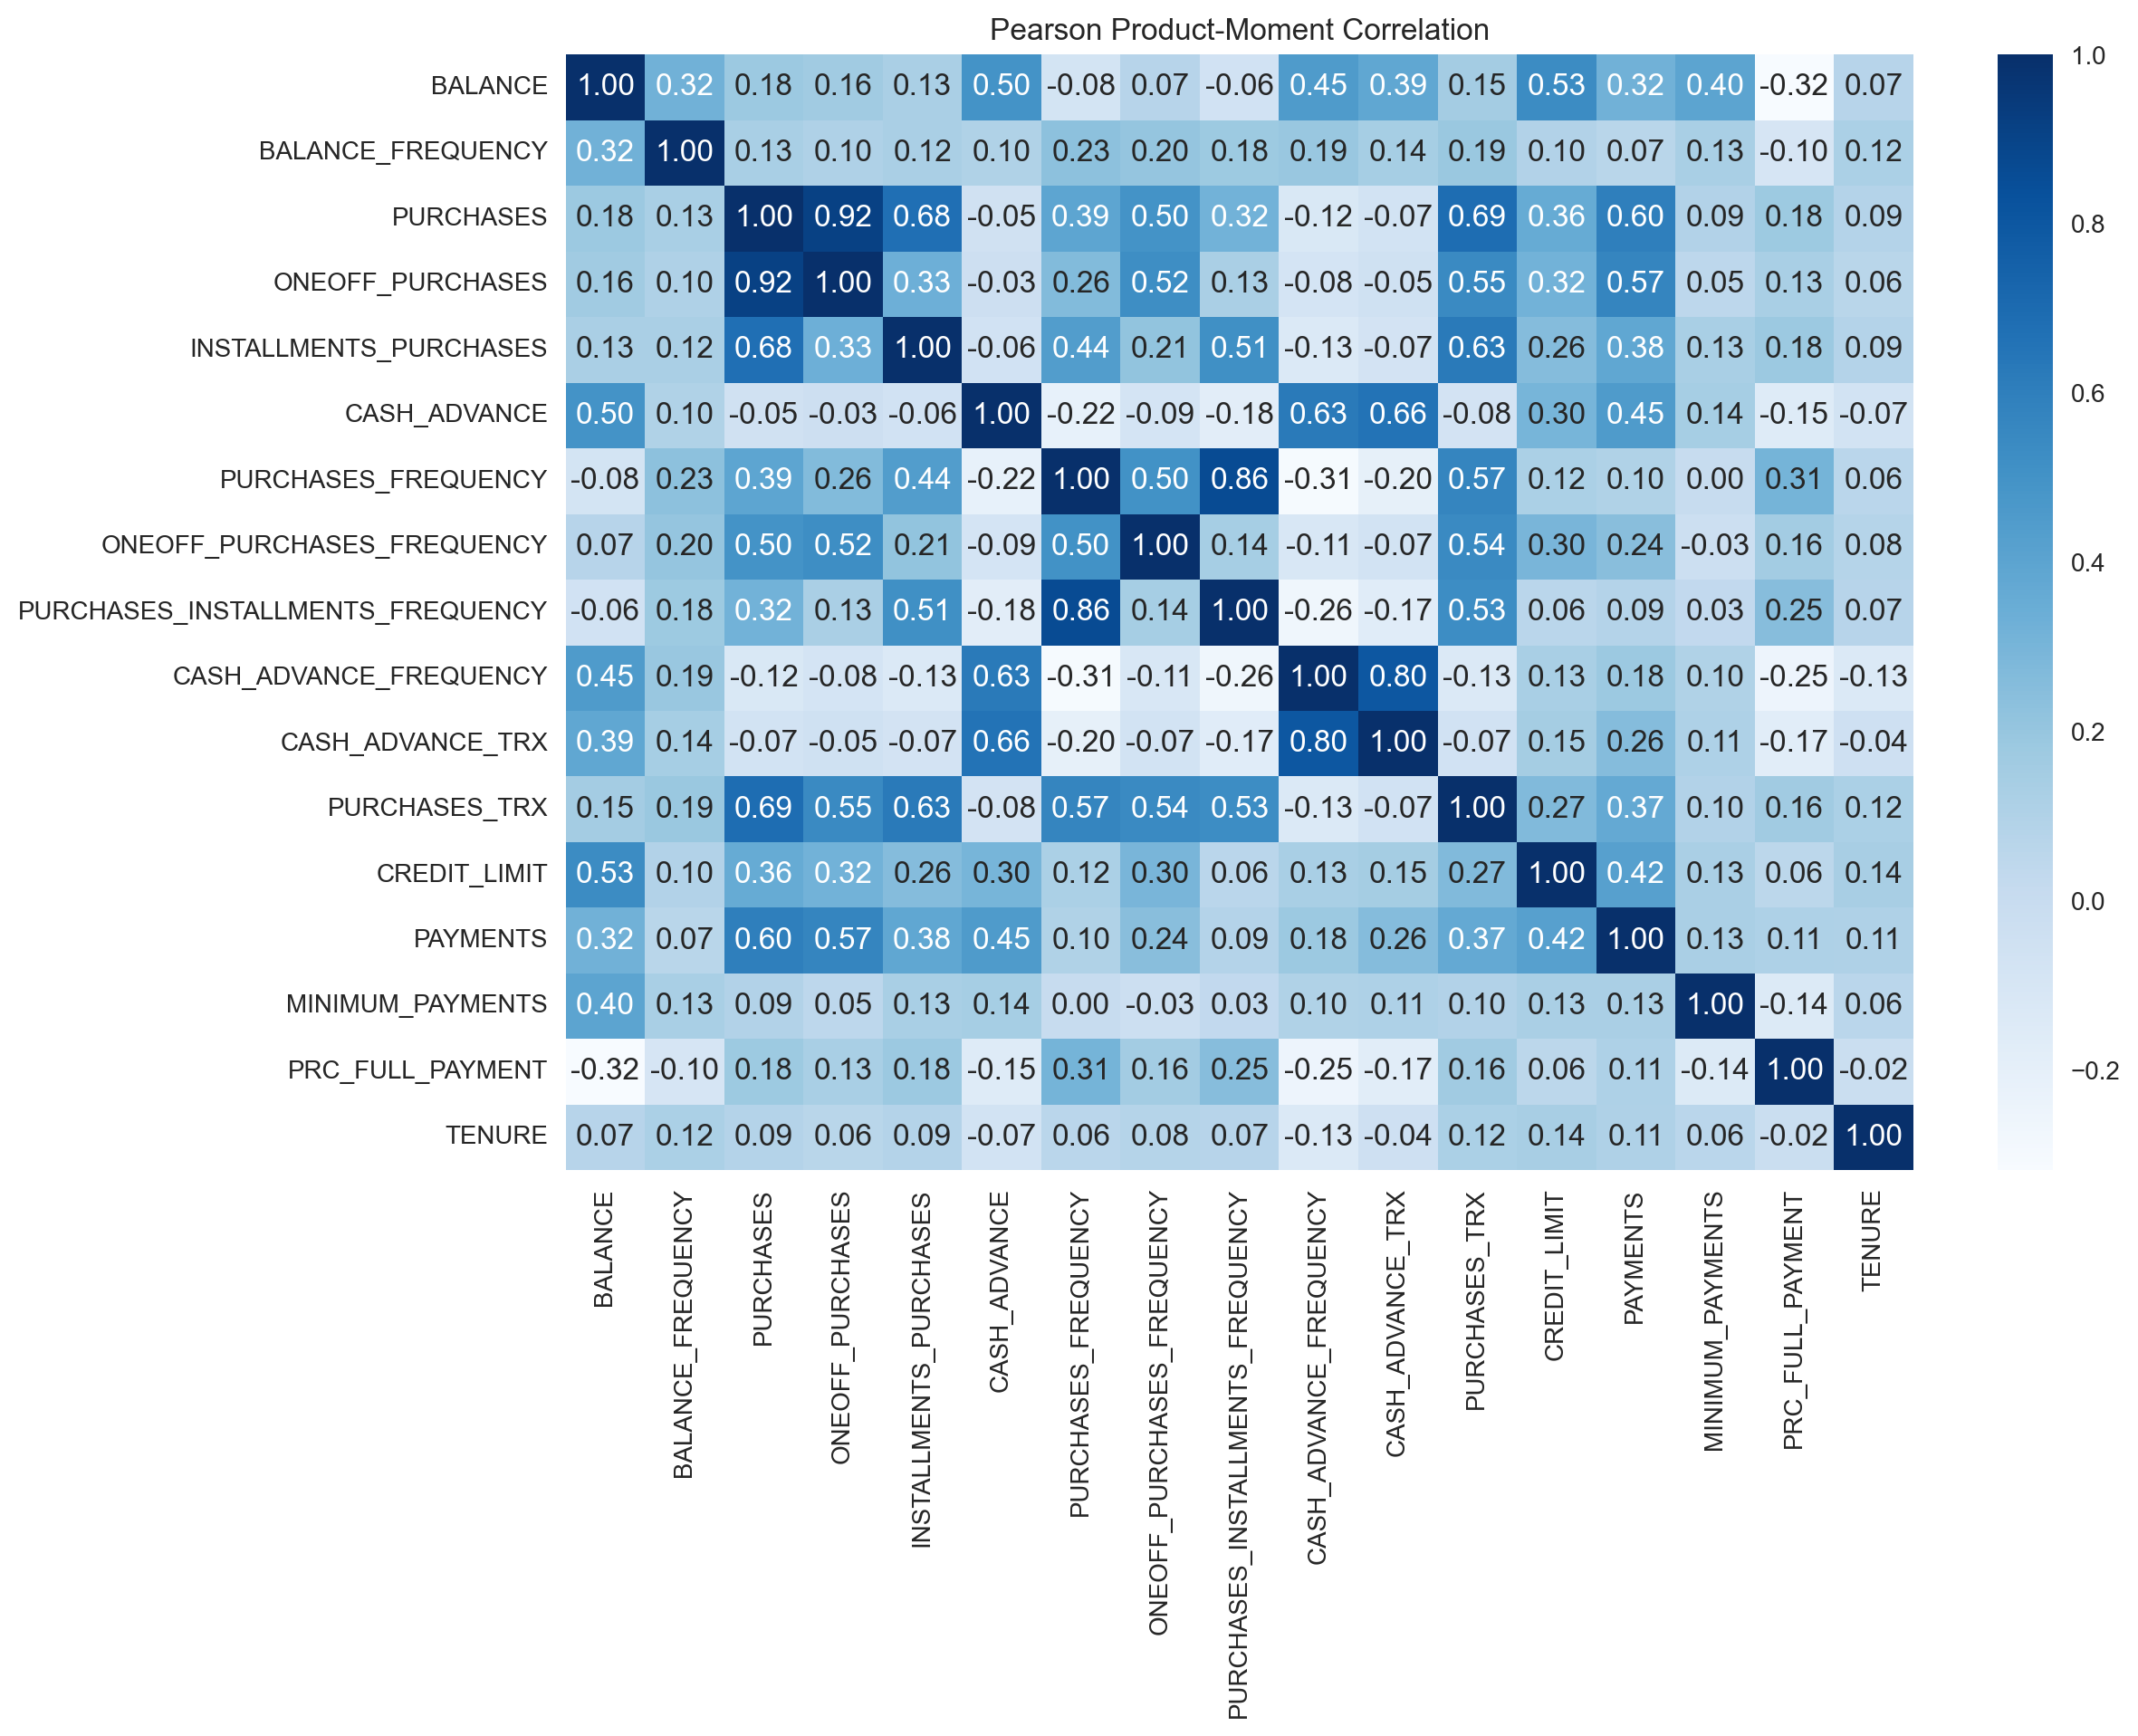

In [14]:
# Correlation dapat dilihat dengan Heatmap
fig,ax = plt.subplots(figsize=(12,8),dpi=200)
sns.heatmap(ax=ax,data=df.corr(),cmap="Blues",annot=True,fmt=".2f")
ax.set_title("Pearson Product-Moment Correlation")
plt.show()

Beberapa variabel memiliki nilai korelasi sedang hingga tinggi dengan variabel lain (>0.5 hingga 1). Contohnya adalah variabel PURCHASES dan ONEOFF_PURCHASES, dengan nilai korelasi 0.92. Contoh lainnya adalah antara CASH_ADVANCE_TRX dengan CASH_ADVANCE_FREQUENCY yang memiliki nilai korelasi 0.8.

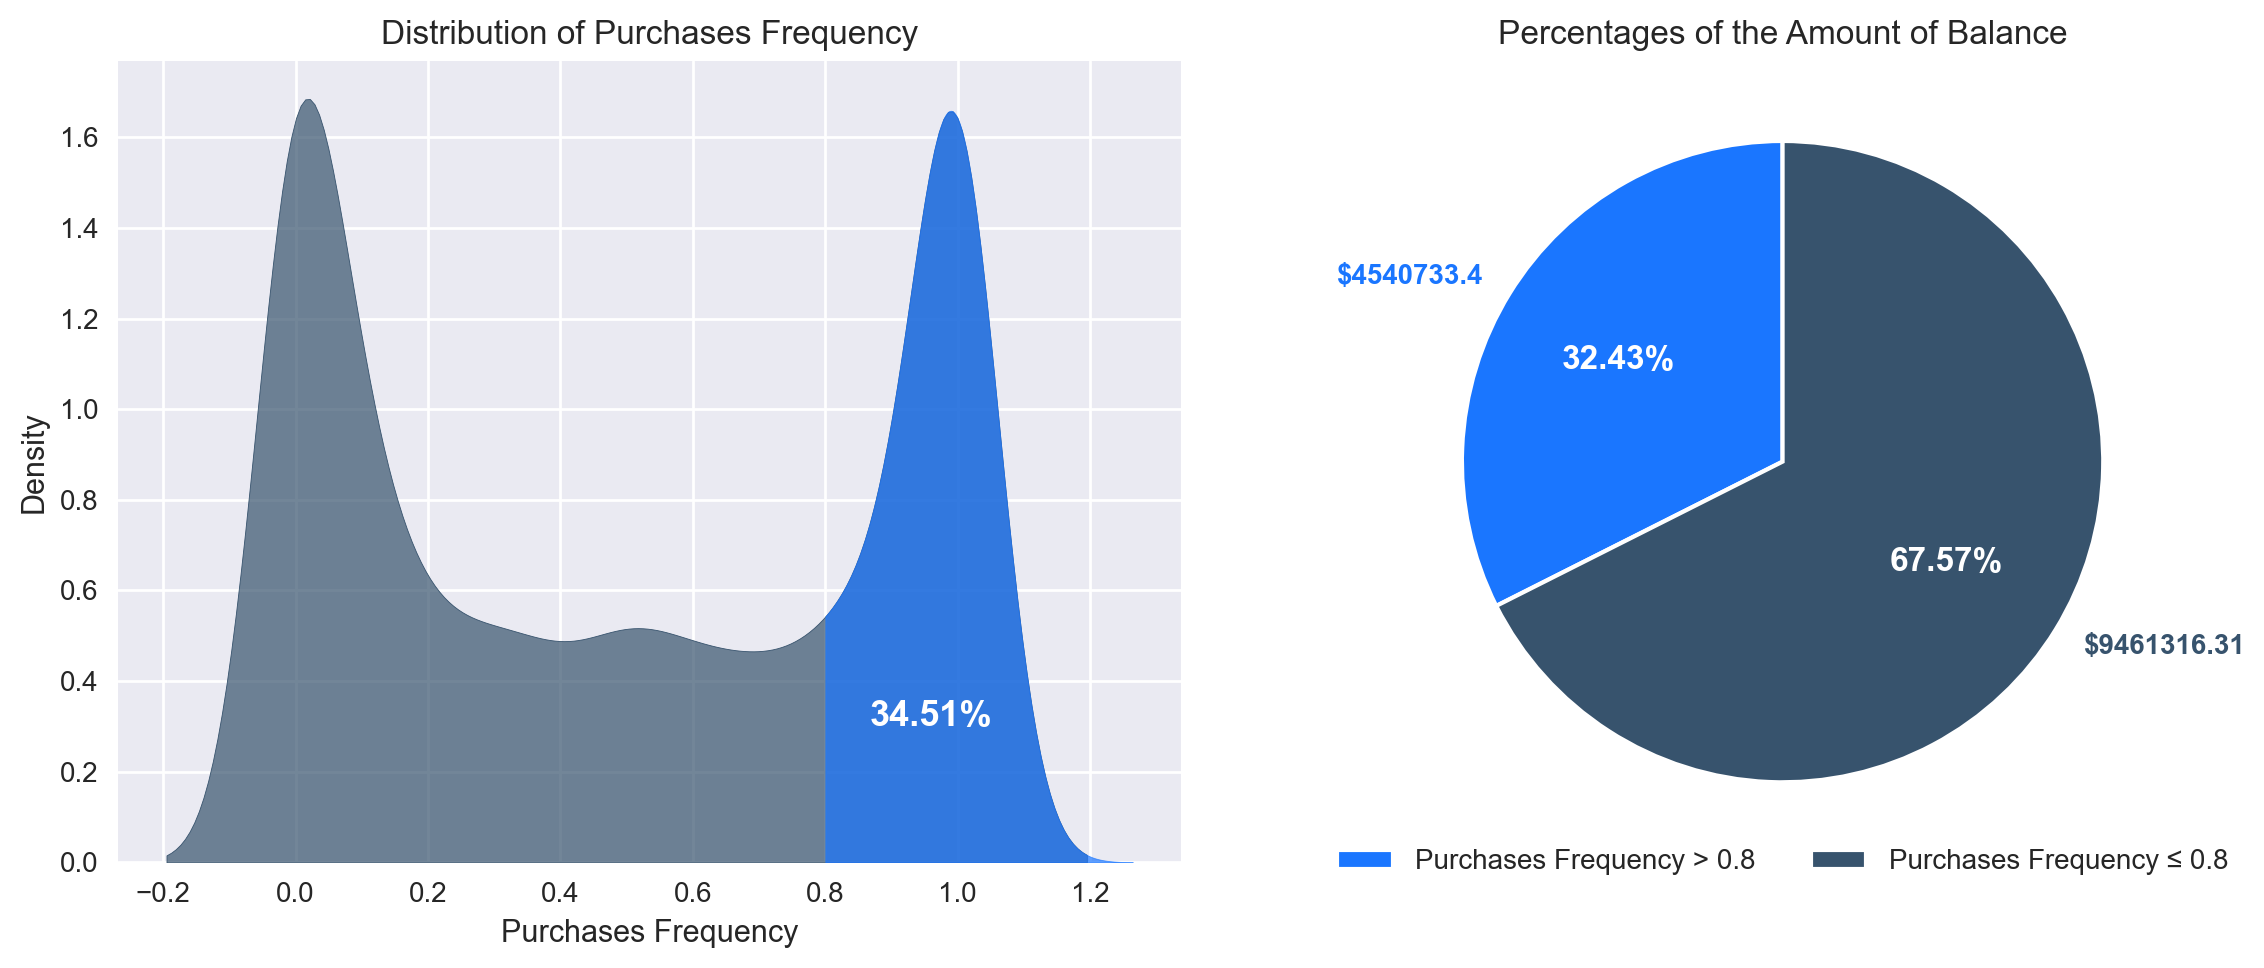

In [15]:
fig,ax = plt.subplots(1,2,figsize=(12,5),dpi=200)

kde_plot = sns.kdeplot(ax=ax[0],data=df,x="PURCHASES_FREQUENCY",color="#37536d",fill=True,alpha=0.7)
xmin,xmax = kde_plot.get_xlim()
kde = gaussian_kde(df["PURCHASES_FREQUENCY"])
x = np.linspace(xmin,xmax,10_000)
kde_y = kde(x)
x0,y0 = [],[]
for i,j in zip(x,kde_y):
    if i > 0.8:
        x0.append(i)
        y0.append(j)
x0,y0 = np.array(x0),np.array(y0)
area0 = round(simps(y0,x0,dx=1) * 100,0)
kde_plot.fill_between(x=x0,y1=y0,color="#1a76ff",alpha=0.7)
ax[0].text(
    x=0.96,
    y=0.3,
    horizontalalignment="center",
    s=f"{round(len(df[df['PURCHASES_FREQUENCY'] > 0.8]) / len(df) * 100,2)}%",
    color="white",
    fontweight="bold",
    fontsize=13
)
ax[0].set_title("Distribution of Purchases Frequency")
ax[0].set_xlabel("Purchases Frequency")

patches,texts,pcts = ax[1].pie(
    [df[df["PURCHASES_FREQUENCY"] > 0.8]["BALANCE"].sum(),df[df["PURCHASES_FREQUENCY"] <= 0.8]["BALANCE"].sum()],
    labels=[f'${round(df[df["PURCHASES_FREQUENCY"] > 0.8]["BALANCE"].sum(),2)}',f'${round(df[df["PURCHASES_FREQUENCY"] <= 0.8]["BALANCE"].sum(),2)}'],
    startangle=90,
    colors=["#1a76ff","#37536d"],
    autopct="%.2f%%",
    wedgeprops={"linewidth":1.5,"edgecolor":"white"}
)
ax[1].set_title("Percentages of the Amount of Balance")
ax[1].legend(patches,["Purchases Frequency > 0.8","Purchases Frequency ≤ 0.8"],ncol=2,bbox_to_anchor=(0.5,0),loc="center")
for index,patch in enumerate(patches):
    texts[index].set_color(patch.get_facecolor())
plt.setp(pcts,color="white",fontweight="bold")
plt.setp(texts,fontweight="bold")

plt.tight_layout()
plt.show()

Dapat dilihat bahwa total saldo pelanggan yang paling sering membeli (misal ditetapkan batas 0.8) menyumbang 32,43% dari total saldo seluruh pelanggan.

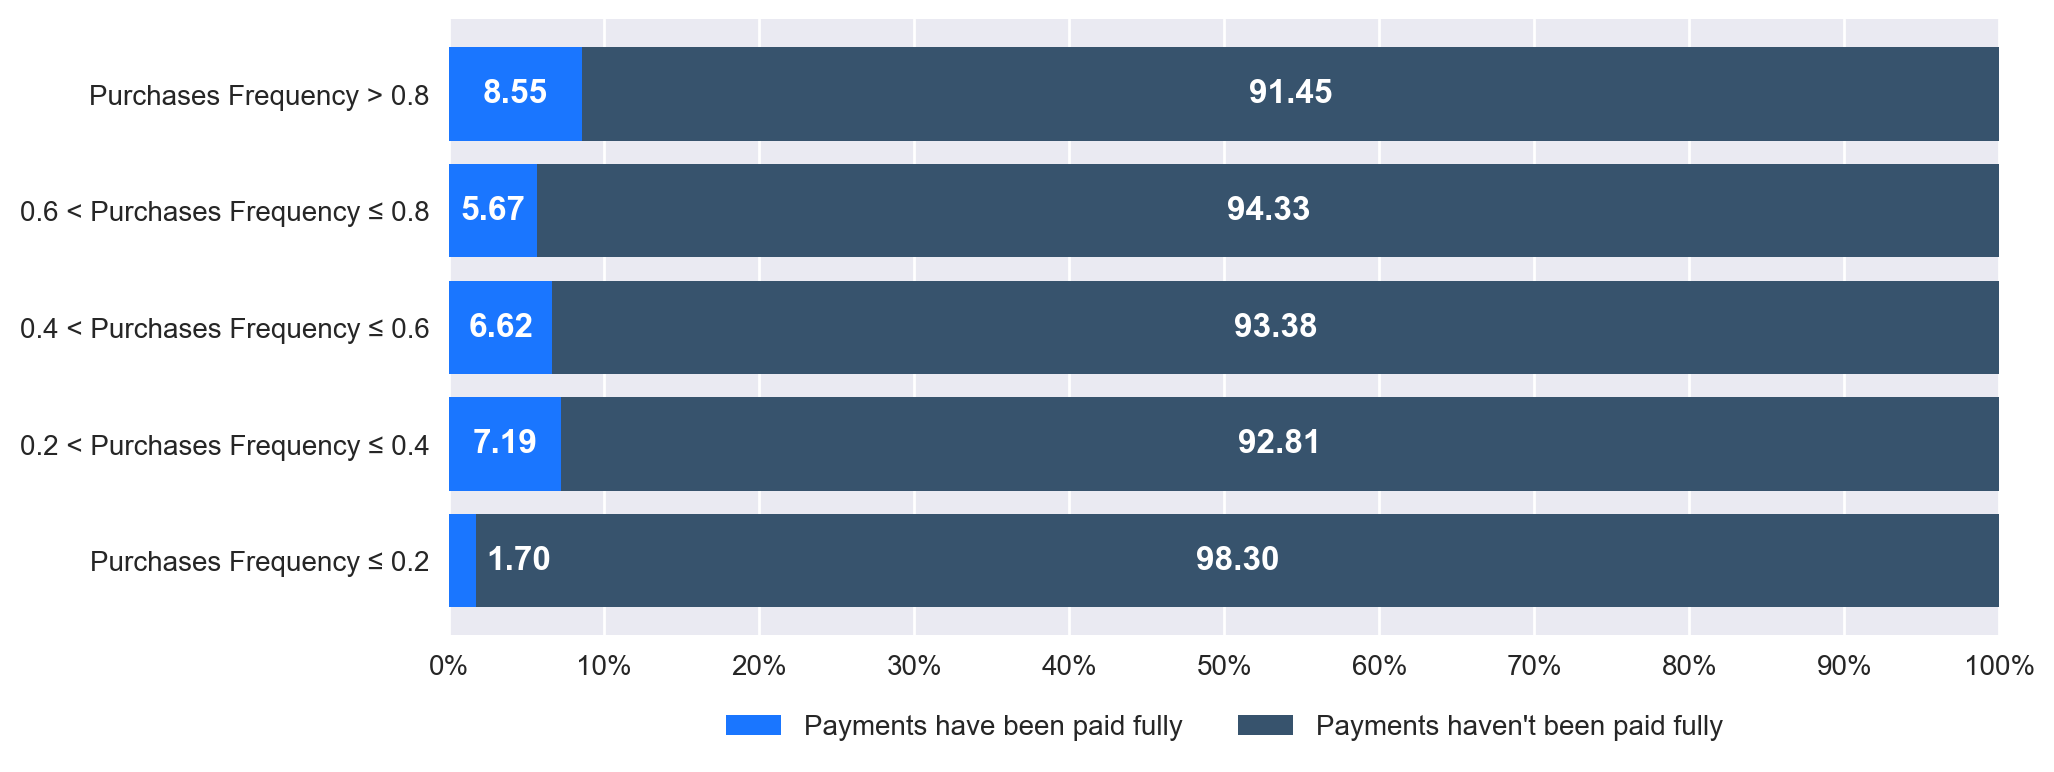

In [16]:
first = df[df["PURCHASES_FREQUENCY"] <= 0.2]
second = df[(df["PURCHASES_FREQUENCY"] > 0.2) & (df["PURCHASES_FREQUENCY"] <= 0.4)]
third = df[(df["PURCHASES_FREQUENCY"] > 0.4) & (df["PURCHASES_FREQUENCY"] <= 0.6)]
fourth = df[(df["PURCHASES_FREQUENCY"] > 0.6) & (df["PURCHASES_FREQUENCY"] <= 0.8)]
fifth = df[df["PURCHASES_FREQUENCY"] > 0.8]
labels = [
    "Purchases Frequency ≤ 0.2","0.2 < Purchases Frequency ≤ 0.4","0.4 < Purchases Frequency ≤ 0.6",
    "0.6 < Purchases Frequency ≤ 0.8","Purchases Frequency > 0.8"
]

prc_full_payment_is_1,prc_full_payment_not_1 = [],[]
for subset in [first,second,third,fourth,fifth]:
    prc_full_payment_is_1.append(len(subset[subset["PRC_FULL_PAYMENT"] == 1]) / len(subset) * 100)
    prc_full_payment_not_1.append(len(subset[subset["PRC_FULL_PAYMENT"] != 1]) / len(subset) * 100)

fig,ax = plt.subplots(figsize=(10,4),dpi=200)
n = 0

for label,prc_is_1,prc_not_1 in zip(labels,prc_full_payment_is_1,prc_full_payment_not_1):
    if n == 0:
        ax.barh(label,prc_is_1,color="#1a76ff",label="Payments have been paid fully")
        ax.barh(label,prc_not_1,left=prc_is_1,color="#37536d",label="Payments haven't been paid fully")
        n += 1
    else:
        ax.barh(label,prc_is_1,color="#1a76ff")
        ax.barh(label,prc_not_1,left=prc_is_1,color="#37536d")
for container in ax.containers[:1]:
    ax.bar_label(container,fmt="%.2f",padding=4,color="white",fontweight="bold")
for container in ax.containers[1:]:
    ax.bar_label(container,fmt="%.2f",label_type="center",color="white",fontweight="bold")

ax.set_xlim(xmax=100)
ax.set_xticks(np.arange(0,101,10),[f"{xtick}%" for xtick in np.arange(0,101,10)])
ax.legend(ncol=2,bbox_to_anchor=(0.5,-0.15),loc="center")

plt.show()

Dari plot di atas dapat disimpulkan bahwa seberapa sering pun pelanggan melakukan pembelian, hanya kurang dari 10% yang telah membayar lunas di setiap kelompok.

#### Credit Limit vs Balance Based on Tenure

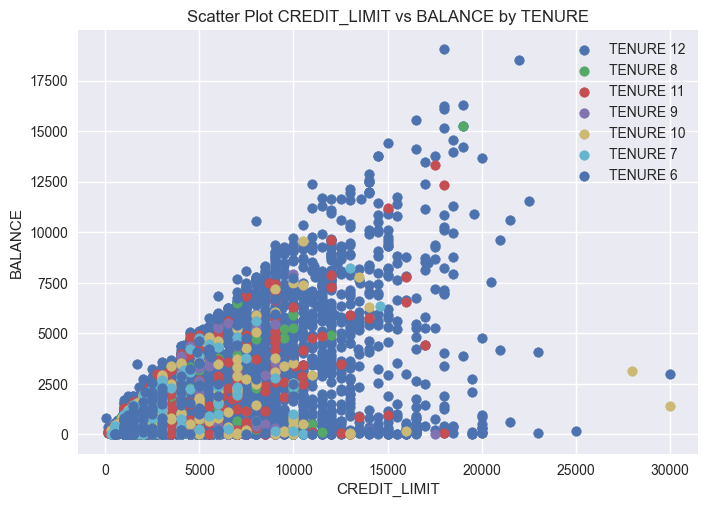

In [17]:
tenures = df['TENURE'].unique()
for tenure in tenures:
    subset = df[df['TENURE'] == tenure]
    plt.scatter(subset['CREDIT_LIMIT'], subset['BALANCE'], label=f'TENURE {tenure}')

plt.xlabel('CREDIT_LIMIT')
plt.ylabel('BALANCE')
plt.legend()
plt.title('Scatter Plot CREDIT_LIMIT vs BALANCE by TENURE')
plt.show()

Dari hasil diatas dapat dilihat bahwa sebagian besar pelanggan kartu kredit lebih memilih jangka waktu 12 bulan.

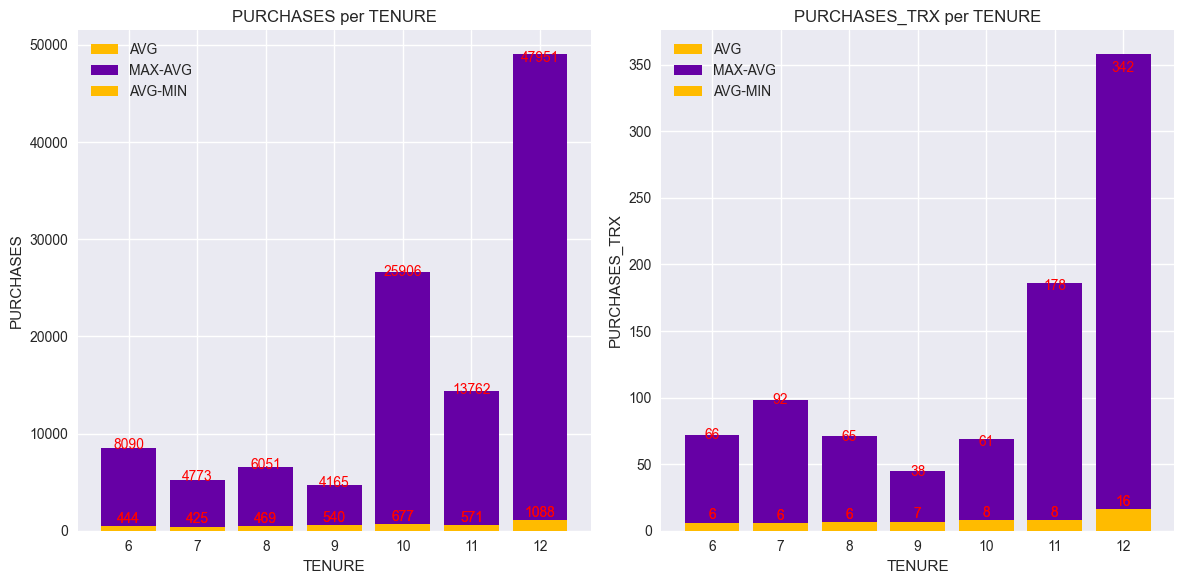

In [18]:
eda2_1 = df[['PURCHASES', 'TENURE']]
eda2_1 = eda2_1.groupby('TENURE').agg(MIN=('PURCHASES', 'min'), AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()

eda2_2 = df[['PURCHASES_TRX', 'TENURE']]
eda2_2 = eda2_2.groupby('TENURE').agg(MIN=('PURCHASES_TRX', 'min'), AVG=('PURCHASES_TRX', 'mean'), MAX=('PURCHASES_TRX', 'max')).reset_index()

plt.figure(figsize=(12, 6))

# Bar plot PURCHASES per TENURE
plt.subplot(1, 2, 1)
bars1 = plt.bar(eda2_1['TENURE'], eda2_1['AVG'], color='#FFBB00', label='AVG')
bars2 = plt.bar(eda2_1['TENURE'], eda2_1['MAX'] - eda2_1['AVG'], bottom=eda2_1['AVG'], color='#6600A5', label='MAX-AVG')
bars3 = plt.bar(eda2_1['TENURE'], eda2_1['AVG'] - eda2_1['MIN'], bottom=eda2_1['MIN'], color='#FFBB00', label='AVG-MIN')
plt.xlabel('TENURE')
plt.ylabel('PURCHASES')
plt.title('PURCHASES per TENURE')
plt.legend()

# Add values PURCHASES above each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval), ha='center', va='bottom', fontsize=10, color='red')

# Menambahkan values PURCHASES_TRX per TENURE
plt.subplot(1, 2, 2)
bars4 = plt.bar(eda2_2['TENURE'], eda2_2['AVG'], color='#FFBB00', label='AVG')
bars5 = plt.bar(eda2_2['TENURE'], eda2_2['MAX'] - eda2_2['AVG'], bottom=eda2_2['AVG'], color='#6600A5', label='MAX-AVG')
bars6 = plt.bar(eda2_2['TENURE'], eda2_2['AVG'] - eda2_2['MIN'], bottom=eda2_2['MIN'], color='#FFBB00', label='AVG-MIN')
plt.xlabel('TENURE')
plt.ylabel('PURCHASES_TRX')
plt.title('PURCHASES_TRX per TENURE')
plt.legend()

# Menambahkan values PURCHASES_TRX di atas setiap bar
for bars in [bars4, bars5, bars6]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval), ha='center', va='bottom', fontsize=10, color='red')

plt.tight_layout()
plt.show()

Dapat disimpulkan bahwa pelanggan kartu kredit dengan tenur selama 12 bulan cenderung melakukan pembelian dengan jumlah yang lebih besar dan memiliki lebih banyak transaksi pembelian total dibandingkan dengan pelanggan dengan tenur lainnya.

Grafik di atas juga menunjukkan bahwa pelanggan dengan tenur sepuluh bulan memiliki jumlah pembelian yang lebih tinggi daripada pelanggan dengan tenur sebelas bulan. Namun, hal ini berbanding terbalik dengan total transaksi, di mana pelanggan dengan tenur sepuluh bulan memiliki jumlah transaksi yang lebih sedikit daripada pelanggan dengan tenur sebelas bulan. 

**Kesimpulan**. Dari beberapa proses yang telah dilakukan dapat diketahui :

- Pengguna kartu kredit cenderung memilih tenor 12 bulan dibanding opsi tenor lainnya saat menggunakan kartu kredit. Ini bisa diambil kesimpulan bahwa pelanggan cenderung lebih cenderung untuk melunasi kredit dalam jangka panjang dengan konsekuensi tingginya tingkat bunga.
- Sebagian besar akun kartu kredit memiliki skor 1 pada kolom FREKUENSI_BALANCE, yang menunjukkan bahwa sebagian besar pelanggan menggunakan kartu kredit secara teratur. Namun, hal ini berbeda dengan ONEOFF_PURCHASES dan PURCHASES_INSTALLMENT_FREQUENCY, di mana mayoritas pelanggan tidak menggunakan kartu kredit untuk transaksi sekali bayar atau pembayaran dalam angsuran.

## F. Data Preprocessing

In [19]:
# Melakukan Impute dengan KNNImputer()
null_columns = df.columns[df.isnull().any()].tolist()
imputer = KNNImputer()
df_imp = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns=null_columns)
df = df.fillna(df_imp)

In [20]:
# Karena setiap variabel memiliki scale yang berbeda, maka akan dilakukan standarisasi dengan StandardScaler()
X = pd.DataFrame(StandardScaler().fit_transform(df))

# Transform X menjadi array
X = np.asarray(X)

Akan dilakukan reduksi dimensi menggunakan metode Principal Component Analysis (PCA). PCA mengurangi jumlah dimensi dalam data sambil mempertahankan informasi yang relevan. 

In [21]:
# Applying PCA
pca = PCA(n_components=2, random_state=24)
X = pca.fit_transform(X)

## G-I. Models Definition, Models Training and Models Evaluation

In [22]:
# Membuat fungsi untuk mengevaluasi clustering models nantinya
def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    print('Evaluate Clustering Quality')
    print('Davies-Bouldin Index:', db_index)
    print('Silhouette Score:', s_score)
    print('Calinski Harabasz Index:', ch_index)
    return db_index, s_score, ch_index

### K-Means Clustering

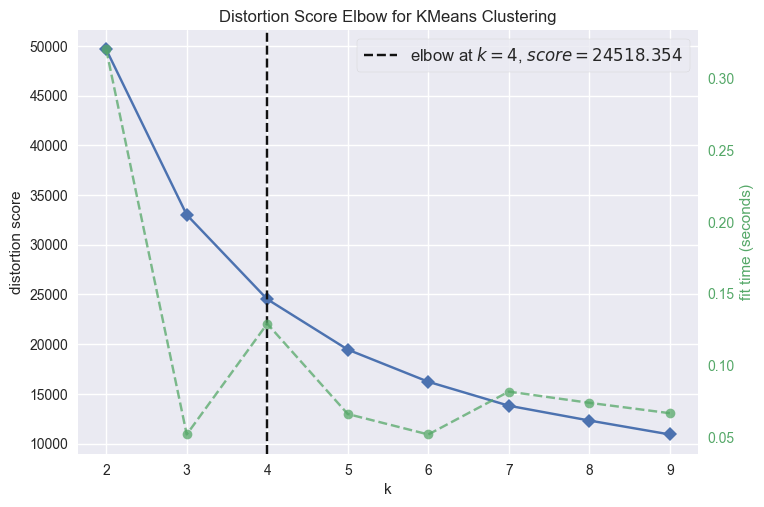

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Elbow Method
model = KMeans(random_state=42, n_init=10)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(X)       
distortion_visualizer.show()       

Berdasarkan hasil dari elbow method diatas dapat diketahui bahwa jumlah klaster terbaik untuk alghoritma K-Means adalah 4 klaster.

In [24]:
# Implementing K-Means
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500, n_init=10)
y_kmeans = kmeans.fit_predict(X)

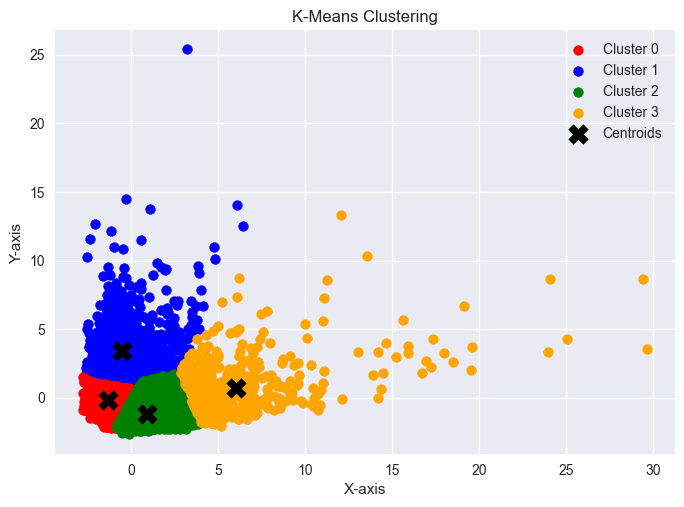

In [25]:
# Cluster labels K-Means
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label='Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='orange', label='Cluster 3')

# Plotting centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [26]:
# Cluster labels K-Means
unique, counts = np.unique(y_kmeans, return_counts=True)
cluster_counts = dict(zip(unique, counts))
total_points = len(y_kmeans)

for cluster, count in cluster_counts.items():
    percentage = (count / total_points) * 100
    print(f"Cluster {cluster}: {percentage:.2f}%")

Cluster 0: 43.78%
Cluster 1: 13.91%
Cluster 2: 36.69%
Cluster 3: 5.62%


In [29]:
# Menyimpan hasil prediksi K-Means ke df_pred serta melihat count dari masing-masing cluster K-Means
df['KMEANS_PREDICT'] = kmeans.labels_
df['KMEANS_PREDICT'].value_counts().to_frame().reset_index()

,KMEANS_PREDICT,count
0,0,3918
1,2,3284
2,1,1245
3,3,503


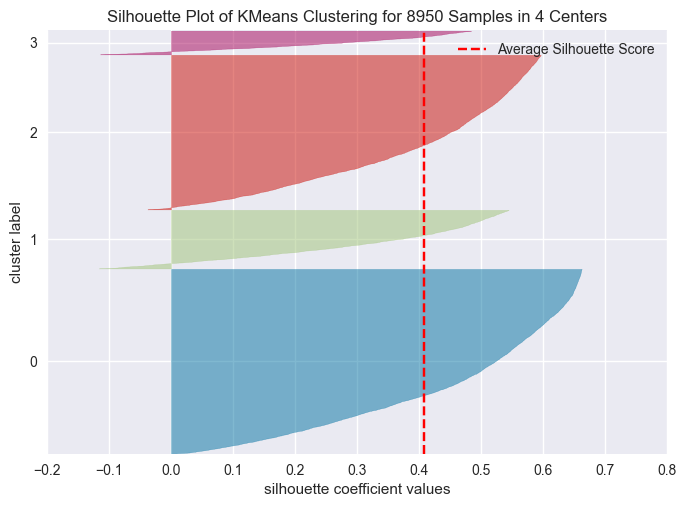

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
# Visualisasi Silhoutte K-Means
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

Dari hasil silhouette plot diatas dapat dilihat :
* Nilai siluet setiap klaster berada di atas rata-rata, menunjukkan bahwa semua klaster optimal. Selain itu, dari fluktuasi ukuran plot siluet, semua klaster memiliki fluktuasi yang serupa. Namun, dari ketebalannya, klaster 0 dan 2 memiliki konsistensi yang lebih tebal dibandingkan klaster lainnya.
* Dibandingkan dengan klaster lainnya, klaster 0 dan 2 memiliki viskositas yang lebih tinggi. Hal ini karena sebagian besar titik data terletak di sudut kiri bawah dari scatter plot, dan jumlah pelanggan dalam kedua klaster tersebut lebih dari 35%.

In [28]:
# Evaluasi K-Means Clustering
db_kmeans, ss_kmeans, ch_kmeans = evaluate_clustering(X, y_kmeans)

Evaluate Clustering Quality
Davies-Bouldin Index: 0.801
Silhouette Score: 0.408
Calinski Harabasz Index: 5823.676


Berdasarkan nilai evaluasi yang didapat dapat disimpulkan :
* Nilai Davies-Bouldin Index sebesar 0.801 dapat dianggap sebagai hasil yang baik, menunjukkan adanya pemisahan yang baik antar klaster, namun masih memungkinkan adanya sedikit tumpang tindih.
* Nilai Silhouette Score sebesar 0.408 menunjukkan bahwa pengelompokan memiliki pemisahan yang cukup baik, namun masih ada sebagian data yang mungkin terletak cukup dekat dengan batas antar klaster.
* Nilai Calinski Harabasz Index sebesar 5823.676 menunjukkan bahwa klaster-klasternya memiliki kompakitas yang tinggi dan terpisah dengan jelas.

### Cluster Customer Based on the K-Means Model

In [30]:
# Menambahkan K-Means Prediction ke Dataframe
df['cluster_result'] = y_kmeans
df['cluster_result'] = 'Cluster '+df['cluster_result'].astype(str)

# Menghitung Mean Keseluruhan dari Dataframe tersebut
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = df.describe().loc[['mean']].T

In [31]:
df_cluster_summary = df.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

In [32]:
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()

In [33]:
# Menampilkan df_profile
df_profile

,Column Name,Metrics,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Overall
0,BALANCE,mean,1012.915503,4510.612798,824.180354,3401.840056,1564.474828
1,BALANCE_FREQUENCY,mean,0.799792,0.963486,0.919997,0.988427,0.877271
2,PURCHASES,mean,223.081279,462.647357,1236.499406,6894.613917,1003.204834
3,ONEOFF_PURCHASES,mean,157.576608,300.127390,621.738764,4511.889901,592.437371
4,INSTALLMENTS_PURCHASES,mean,65.833785,162.619301,614.965725,2383.916859,411.067645
5,CASH_ADVANCE,mean,614.588758,4401.478579,147.442197,773.154467,978.871112
6,PURCHASES_FREQUENCY,mean,0.190099,0.266258,0.862440,0.954443,0.490351
7,ONEOFF_PURCHASES_FREQUENCY,mean,0.074901,0.129829,0.301883,0.726667,0.202458
8,PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.109962,0.166187,0.675116,0.808946,0.364437
9,CASH_ADVANCE_FREQUENCY,mean,0.122459,0.470904,0.030698,0.084806,0.135144


In [39]:
# Menampilkan df
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMEANS_PREDICT,cluster_result
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,Cluster 0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,Cluster 1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2,Cluster 2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1215.951453,0.000000,12,0,Cluster 0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,Cluster 0


## J. Models Inference

Membuat data baru dengan merandom data dengan masing-masing minimal dan maximal values pada masing-masing column.

In [35]:
BALANCE = [] 
for i in range(0,5):
    n = random.uniform(df['BALANCE'].min(),df['BALANCE'].max()) 
    BALANCE.append(n)

BALANCE_FREQUENCY = [] 
for i in range(0,5):
    n = random.uniform(df['BALANCE_FREQUENCY'].min(),df['BALANCE_FREQUENCY'].max()) 
    BALANCE_FREQUENCY.append(n)

PURCHASES = [] 
for i in range(0,5):
    n = random.uniform(df['PURCHASES'].min(),df['PURCHASES'].max()) 
    PURCHASES.append(n)

ONEOFF_PURCHASES = [] 
for i in range(0,5):
    n = random.uniform(df['ONEOFF_PURCHASES'].min(),df['ONEOFF_PURCHASES'].max()) 
    ONEOFF_PURCHASES.append(n)

INSTALLMENTS_PURCHASES = [] 
for i in range(0,5):
    n = random.uniform(df['INSTALLMENTS_PURCHASES'].min(),df['INSTALLMENTS_PURCHASES'].max()) 
    INSTALLMENTS_PURCHASES.append(n)

CASH_ADVANCE = [] 
for i in range(0,5):
    n = random.uniform(df['CASH_ADVANCE'].min(),df['CASH_ADVANCE'].max()) 
    CASH_ADVANCE.append(n)

PURCHASES_FREQUENCY = [] 
for i in range(0,5):
    n = random.uniform(df['PURCHASES_FREQUENCY'].min(),df['PURCHASES_FREQUENCY'].max()) 
    PURCHASES_FREQUENCY.append(n)

ONEOFF_PURCHASES_FREQUENCY = [] 
for i in range(0,5):
    n = random.uniform(df['ONEOFF_PURCHASES_FREQUENCY'].min(),df['ONEOFF_PURCHASES_FREQUENCY'].max()) 
    ONEOFF_PURCHASES_FREQUENCY.append(n)

PURCHASES_INSTALLMENTS_FREQUENCY = [] 
for i in range(0,5):
    n = random.uniform(df['PURCHASES_INSTALLMENTS_FREQUENCY'].min(),df['PURCHASES_INSTALLMENTS_FREQUENCY'].max()) 
    PURCHASES_INSTALLMENTS_FREQUENCY.append(n)

CASH_ADVANCE_FREQUENCY = [] 
for i in range(0,5):
    n = random.uniform(df['CASH_ADVANCE_FREQUENCY'].min(),df['CASH_ADVANCE_FREQUENCY'].max()) 
    CASH_ADVANCE_FREQUENCY.append(n)

CASH_ADVANCE_TRX = [] 
for i in range(0,5):
    n = random.uniform(df['CASH_ADVANCE_TRX'].min(),df['CASH_ADVANCE_TRX'].max()) 
    CASH_ADVANCE_TRX.append(n)

PURCHASES_TRX = [] 
for i in range(0,5):
    n = random.uniform(df['PURCHASES_TRX'].min(),df['PURCHASES_TRX'].max()) 
    PURCHASES_TRX.append(n)

CREDIT_LIMIT = [] 
for i in range(0,5):
    n = random.uniform(df['CREDIT_LIMIT'].min(),df['CREDIT_LIMIT'].max()) 
    CREDIT_LIMIT.append(n)

PAYMENTS = [] 
for i in range(0,5):
    n = random.uniform(df['PAYMENTS'].min(),df['PAYMENTS'].max()) 
    PAYMENTS.append(n)

MINIMUM_PAYMENTS = [] 
for i in range(0,5):
    n = random.uniform(df['MINIMUM_PAYMENTS'].min(),df['MINIMUM_PAYMENTS'].max()) 
    MINIMUM_PAYMENTS.append(n)

PRC_FULL_PAYMENT = [] 
for i in range(0,5):
    n = random.uniform(df['PRC_FULL_PAYMENT'].min(),df['PRC_FULL_PAYMENT'].max()) 
    PRC_FULL_PAYMENT.append(n)

TENURE = [] 
for i in range(0,5):
    n = random.uniform(df['TENURE'].min(),df['TENURE'].max()) 
    TENURE.append(n)

In [36]:
model_inference = {
    'BALANCE': BALANCE,
    'BALANCE_FREQUENCY': BALANCE_FREQUENCY,
    'PURCHASES': PURCHASES,
    'ONEOFF_PURCHASES': ONEOFF_PURCHASES,
    'INSTALLMENTS_PURCHASES': INSTALLMENTS_PURCHASES,
    'CASH_ADVANCE': CASH_ADVANCE,
    'PURCHASES_FREQUENCY': PURCHASES_FREQUENCY,
    'ONEOFF_PURCHASES_FREQUENCY': ONEOFF_PURCHASES_FREQUENCY, 
    'PURCHASES_INSTALLMENTS_FREQUENCY': PURCHASES_INSTALLMENTS_FREQUENCY,
    'CASH_ADVANCE_FREQUENCY':CASH_ADVANCE_FREQUENCY,
    'CASH_ADVANCE_TRX': CASH_ADVANCE_TRX,
    'PURCHASES_TRX': PURCHASES_TRX,
    'CREDIT_LIMIT': CREDIT_LIMIT,
    'PAYMENTS': PAYMENTS,
    'MINIMUM_PAYMENTS': MINIMUM_PAYMENTS,
    'PRC_FULL_PAYMENT': PRC_FULL_PAYMENT,
    'TENURE': TENURE
}

model_inference = pd.DataFrame(model_inference)
model_inference

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,14633.359014,0.621788,4324.934886,32640.340762,5688.145503,18481.630176,0.118817,0.263967,0.360526,0.372460,37.089421,120.581316,21884.200660,42623.405467,30613.515807,0.289270,11.545119
1,16736.880219,0.489997,8575.833510,8304.469936,7830.327299,876.267535,0.190224,0.647911,0.985884,0.164629,98.548395,208.804638,14469.004656,31052.886027,34932.525625,0.402645,9.626898
2,3796.420753,0.544408,1599.124068,19549.247605,18258.575920,7967.782426,0.365322,0.262310,0.562432,0.207808,10.316386,45.915786,3233.952031,3025.057087,3389.903569,0.658745,7.876682
3,5594.941715,0.668191,36937.356440,10996.483540,797.597670,34961.485282,0.576741,0.041662,0.573203,0.333650,6.079396,332.656968,546.728197,35652.009477,43132.217151,0.870702,11.678981
4,13481.082683,0.153688,43707.646717,16497.943281,14109.692878,30362.047264,0.825077,0.913537,0.286678,1.101036,39.011954,252.193497,14641.325931,46062.017458,58282.283070,0.755894,6.138478


In [37]:
# Implementing K-Means
y_pred = kmeans.fit_predict(model_inference)
print("Cluster : ",y_pred)

Cluster :  [0 3 2 1 1]


### Saving Models

In [38]:
models = [kmeans]
names = ["kmeans_clustering"]
extension = "pkl"

for model,name in zip(models,names):
    with open(f"{name}.{extension}","wb") as files:
        dump(model,files)
    print(f"{name}.{extension} has been downloaded")

kmeans_clustering.pkl has been downloaded


## K. Conclusion

Terdapat tiga algoritma yang digunakan untuk membuat klaster, yaitu algoritma K-Means, Hierarchical, dan DBSCAN. Sebelum membuat model dengan kedua algoritma tersebut. Dilakukan beberapa tahapan preprocessing yaitu : 
1. Dropping variables yang tidak diperlukan 
2. Imputing values untuk data null dengan menggunakan KNNImputer, KNNImputer digunakan karena memungkinkan imputasi yang lebih akurat untuk nilai-nilai yang hilang dalam dataset.
3. Scalling, menggunakan standar scaler untuk menghasilkan pengelompokan yang berkualitas tinggi, dan meningkatkan akurasi algoritma pengelompokan.

Dari ketiga model yang digunakan, didapatkan hasil model dengan menggunakan K-Means lebih baik dibandingkan dengan Hierarchical Clustering dan DBSCAN.

Dengan menggunakan algoritma K-Means didapatkan karakteristik dari tiap klaster sebagai berikut :
* Klaster 0 cenderung terdiri dari pengguna kartu kredit yang memiliki saldo rata-rata rendah, melakukan pembelian dalam jumlah kecil dengan frekuensi rendah, serta tidak terlalu sering melakukan penarikan uang tunai (cash advance). Mereka umumnya memiliki limit kredit yang relatif rendah dan cenderung tidak melakukan pembayaran penuh secara rutin.
* Klaster 1 terdiri dari pengguna kartu kredit dengan saldo rata-rata tertinggi, sering melakukan pembelian baik dalam jumlah besar maupun kecil, juga cenderung melakukan penarikan uang tunai (cash advance) dalam jumlah yang signifikan. Mereka memiliki limit kredit yang tinggi namun cenderung lebih jarang melakukan pembayaran penuh.
* Klaster 2 terdiri dari pengguna kartu kredit yang memiliki saldo rata-rata rendah namun aktif dalam melakukan pembelian dalam jumlah besar dengan frekuensi tinggi. Mereka jarang melakukan penarikan uang tunai (cash advance), memiliki limit kredit yang sedang, dan cenderung lebih sering melakukan pembayaran penuh.
* Klaster 3 terdiri dari pengguna kartu kredit dengan saldo rata-rata di tengah-tengah, namun sangat aktif dalam melakukan pembelian baik dari segi jumlah maupun frekuensi. Mereka jarang melakukan penarikan uang tunai (cash advance), memiliki limit kredit yang tinggi, dan cenderung lebih sering melakukan pembayaran penuh.